This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Introduction to Keras and TensorFlow

## What's TensorFlow?

## What's Keras?

## Keras and TensorFlow: A brief history

## Setting up a deep-learning workspace

### Jupyter notebooks: The preferred way to run deep-learning experiments

### Using Colaboratory

#### First steps with Colaboratory

#### Installing packages with pip

#### Using the GPU runtime

## First steps with TensorFlow

#### Constant tensors and variables

**All-ones or all-zeros tensors**

In [1]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [2]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


**Random tensors**

In [3]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[-1.5658158 ]
 [ 0.9443949 ]
 [-0.36429766]], shape=(3, 1), dtype=float32)


In [4]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.57366085]
 [0.03478527]
 [0.34489965]], shape=(3, 1), dtype=float32)


**NumPy arrays are assignable**

In [5]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.

**Creating a TensorFlow variable**

In [6]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.19484657],
       [ 1.9067334 ],
       [-2.295598  ]], dtype=float32)>


**Assigning a value to a TensorFlow variable**

In [7]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

**Assigning a value to a subset of a TensorFlow variable**

In [8]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

**Using `assign_add`**

In [9]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

#### Tensor operations: Doing math in TensorFlow

**A few basic math operations**

In [10]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d

#### A second look at the GradientTape API

**Using the `GradientTape`**

In [11]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)
# d(3X^2)/dx = 6
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


**Using `GradientTape` with constant tensor inputs**

In [12]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)  # manually marking the const as trainable parameter
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


**Using nested gradient tapes to compute second-order gradients**

In [13]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2    # S=0.5*gt^2
    speed = inner_tape.gradient(position, time)
    print(speed)   # v=>dt/ds =>1*gt =>9.8t =>0 as t=0
acceleration = outer_tape.gradient(speed, time)
print(acceleration)  # a=dv/dt =>9.8

tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(9.8, shape=(), dtype=float32)


#### An end-to-end example: A linear classifier in pure TensorFlow

**Generating two classes of random points in a 2D plane**

In [14]:
num_samples_per_class = 1000
#sample 1 points
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

#sample 2 points
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

In [16]:
#checking
negative_samples[0], positive_samples[0]

(array([0.32236603, 3.7485489 ]), array([ 2.56712681, -0.10103242]))

**Stacking the two classes into an array with shape (2000, 2)**

In [18]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
inputs.shape

(2000, 2)

In [21]:
#checking
inputs[0], inputs[1000]

(array([0.32236603, 3.748549  ], dtype=float32),
 array([ 2.5671268 , -0.10103242], dtype=float32))

**Generating the corresponding targets (0 and 1)**

In [22]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

targets.shape

(2000, 1)

In [23]:
#checking
targets[:1000].sum(), targets[1000:].sum()

(0.0, 1000.0)

In [ ]:
targets[:,0]

array([0., 0., 0., ..., 1., 1., 1.], dtype=float32)

**Plotting the two point classes**

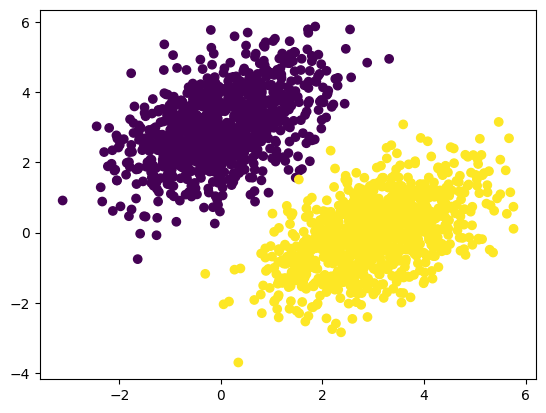

In [24]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

**Creating the linear classifier variables**

In [ ]:
input_dim = 2  #for wx, wy or w0, w1
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))  

**The forward pass function**

In [ ]:
def model(inputs):
    return tf.matmul(inputs, W) + b   # [X Y] . [w0]  + b
                                       #        [w1]

**The mean squared error loss function**

In [ ]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)  #square of delta loss
    return tf.reduce_mean(per_sample_losses) # mean and then reduce dim, that's a scaler value

**The training step function**

In [ ]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets) #MSE Loss
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])  #calculate gradients
    W.assign_sub(grad_loss_wrt_W * learning_rate)  #subtract and assign W losses
    b.assign_sub(grad_loss_wrt_b * learning_rate)  #subtract and assign 
    return loss

**The batch training loop**

In [ ]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 4.8174
Loss at step 1: 0.7874
Loss at step 2: 0.2341
Loss at step 3: 0.1505
Loss at step 4: 0.1310
Loss at step 5: 0.1209
Loss at step 6: 0.1126
Loss at step 7: 0.1052
Loss at step 8: 0.0985
Loss at step 9: 0.0923
Loss at step 10: 0.0866
Loss at step 11: 0.0814
Loss at step 12: 0.0767
Loss at step 13: 0.0723
Loss at step 14: 0.0683
Loss at step 15: 0.0647
Loss at step 16: 0.0614
Loss at step 17: 0.0583
Loss at step 18: 0.0555
Loss at step 19: 0.0529
Loss at step 20: 0.0506
Loss at step 21: 0.0484
Loss at step 22: 0.0464
Loss at step 23: 0.0446
Loss at step 24: 0.0430
Loss at step 25: 0.0415
Loss at step 26: 0.0401
Loss at step 27: 0.0388
Loss at step 28: 0.0376
Loss at step 29: 0.0366
Loss at step 30: 0.0356
Loss at step 31: 0.0347
Loss at step 32: 0.0339
Loss at step 33: 0.0331
Loss at step 34: 0.0325
Loss at step 35: 0.0318
Loss at step 36: 0.0312
Loss at step 37: 0.0307
Loss at step 38: 0.0302
Loss at step 39: 0.0298


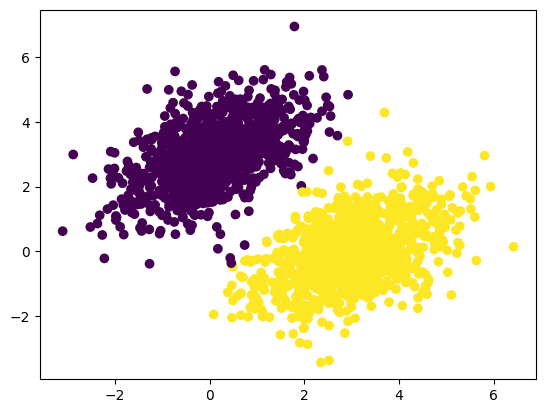

In [ ]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

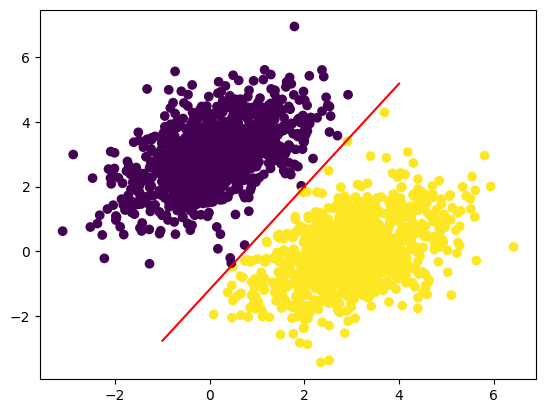

In [ ]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

## Anatomy of a neural network: Understanding core Keras APIs

### Layers: The building blocks of deep learning

#### The base Layer class in Keras

**A `Dense` layer implemented as a `Layer` subclass**

In [25]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y
    
    '''
    def __call__(self, inputs):
        if not self.built:
            self.build(inputs.shape)
            self.built=True
        return self.call(inputs)
    '''

In [26]:
#instantiating one dense layer
my_dense = SimpleDense(units=32, activation=tf.nn.relu)

input_tensor = tf.ones(shape=(2, 784))
#calling layer with defined input
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


#### Automatic shape inference: Building layers on the fly

In [27]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [28]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

Can either be instantiated using models.Sequential([]) or keras.Sequential([])

In [ ]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

In [ ]:
model.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x0000024332B57970>>

### From layers to models

### The "compile" step: Configuring the learning process

In [ ]:
model = keras.Sequential(
    [keras.layers.Dense(1)]
    ) # single input, single layer model

model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

parameters can be passed using keras constants as well, below is preferred way

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

### Picking a loss function

### Understanding the fit() method

**Calling `fit()` with NumPy data**

In [ ]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

Epoch 1/5
16/16 [==============================] - 0s 1ms/step - loss: 5.3838 - binary_accuracy: 0.2740
Epoch 2/5
16/16 [==============================] - 0s 1ms/step - loss: 5.1240 - binary_accuracy: 0.2845
Epoch 3/5
16/16 [==============================] - 0s 1ms/step - loss: 4.9062 - binary_accuracy: 0.2955
Epoch 4/5
16/16 [==============================] - 0s 1ms/step - loss: 4.6969 - binary_accuracy: 0.3035
Epoch 5/5
16/16 [==============================] - 0s 2ms/step - loss: 4.4965 - binary_accuracy: 0.3130


In [ ]:
history.history

{'loss': [5.3837738037109375,
  5.124020576477051,
  4.90620231628418,
  4.69694709777832,
  4.496507167816162],
 'binary_accuracy': [0.27399998903274536,
  0.28450000286102295,
  0.2955000102519989,
  0.3034999966621399,
  0.31299999356269836]}

### Monitoring loss and metrics on validation data

**Using the `validation_data` argument**

In [ ]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

#Most efficient way to randomize the inputs by using indices randomization
indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

# used for train/valid split
num_validation_samples = int(0.3 * len(inputs))

# 30%
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]

# 70%
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]

# training loop
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 [==============================] - 1s 3ms/step - loss: 0.2357 - binary_accuracy: 0.9657 - val_loss: 0.0758 - val_binary_accuracy: 0.9733
Epoch 2/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0718 - binary_accuracy: 0.9564 - val_loss: 0.0738 - val_binary_accuracy: 0.9583
Epoch 3/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0680 - binary_accuracy: 0.9564 - val_loss: 0.2812 - val_binary_accuracy: 0.8283
Epoch 4/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0734 - binary_accuracy: 0.9564 - val_loss: 0.0882 - val_binary_accuracy: 0.9217
Epoch 5/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0661 - binary_accuracy: 0.9679 - val_loss: 0.0814 - val_binary_accuracy: 0.9917


### Inference: Using a model after training

In [ ]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

5/5 [==============================] - 0s 0s/step
[[0.35690814]
 [0.29875883]
 [0.17324159]
 [0.19295129]
 [0.75555634]
 [0.7595488 ]
 [0.28688854]
 [0.64272076]
 [0.4302165 ]
 [0.617336  ]]


## Summary